## Comparative analysis of border and non-border cities in Mexico  - Total Jobs

#### We analyze how employment, wages and the number of factories in Mexico evolved between 2010 and 2021. Also between 2016 and 2021

#### The border states are: Baja California, Sonora, Tamaulipas, Coahuila, Chihuahua and Nuevo Leon.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re

In [2]:
#Open Manufacturing workers data
df = pd.read_csv("data/total-jobs-mexico-refined.csv")
df

,Year,Quarter,City,Jobs,Border
0,2005,1,Acapulco,462422,No
1,2005,2,Acapulco,457457,No
2,2005,3,Acapulco,466297,No
3,2005,4,Acapulco,468169,No
4,2006,1,Acapulco,471384,No
...,...,...,...,...,...
13255,2020,4,Zacatecas,29895,No
13256,2021,1,Zacatecas,21483,No
13257,2021,2,Zacatecas,24310,No
13258,2021,3,Zacatecas,18271,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     13260 non-null  int64 
 1   Quarter  13260 non-null  int64 
 2   City     13260 non-null  object
 3   Jobs     11275 non-null  object
 4   Border   13260 non-null  object
dtypes: int64(2), object(3)
memory usage: 518.1+ KB


In [4]:
df["Jobs"] = pd.to_numeric(df["Jobs"], errors='coerce')
df

,Year,Quarter,City,Jobs,Border
0,2005,1,Acapulco,462422.0,No
1,2005,2,Acapulco,457457.0,No
2,2005,3,Acapulco,466297.0,No
3,2005,4,Acapulco,468169.0,No
4,2006,1,Acapulco,471384.0,No
...,...,...,...,...,...
13255,2020,4,Zacatecas,29895.0,No
13256,2021,1,Zacatecas,21483.0,No
13257,2021,2,Zacatecas,24310.0,No
13258,2021,3,Zacatecas,18271.0,No


In [5]:
#Compare change in employment, factory and salaries between border and non-border states
df2 = pd.DataFrame()
df2 ["Jobs-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Jobs-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Jobs"].agg("sum"))

In [6]:
df2

,Jobs-Border,Jobs-NoBorder
0,57000035.0,234487706.0
1,58786973.0,240025705.0
2,60938072.0,244583112.0
3,62991134.0,247863353.0
4,64744551.0,256414618.0
5,65577146.0,259896307.0
6,66721938.0,263220818.0
7,68550694.0,268829496.0
8,69450507.0,271567777.0
9,69976641.0,268316536.0


In [7]:
#Add year column
df2["Year"] = list(df["Year"].unique())
df2

,Jobs-Border,Jobs-NoBorder,Year
0,57000035.0,234487706.0,2005
1,58786973.0,240025705.0,2006
2,60938072.0,244583112.0,2007
3,62991134.0,247863353.0,2008
4,64744551.0,256414618.0,2009
5,65577146.0,259896307.0,2010
6,66721938.0,263220818.0,2011
7,68550694.0,268829496.0,2012
8,69450507.0,271567777.0,2013
9,69976641.0,268316536.0,2014


In [8]:
df3 = pd.DataFrame()

In [9]:
#Calculate percentage changes
df3 ["Year"] = df2["Year"]
df3["Job change - border"] = df2["Jobs-Border"] / df2["Jobs-Border"].iat[5] * 100 -100
df3["Job change - no border"] = df2["Jobs-NoBorder"] / df2["Jobs-NoBorder"].iat[5] * 100 -100

In [10]:
df3

,Year,Job change - border,Job change - no border
0,2005,-13.079421,-9.776438
1,2006,-10.354481,-7.645588
2,2007,-7.074224,-5.892040
3,2008,-3.943465,-4.629906
4,2009,-1.269642,-1.339645
5,2010,0.000000,0.000000
6,2011,1.745718,1.279168
7,2012,4.534427,3.437213
8,2013,5.906571,4.490818
9,2014,6.708885,3.239842


In [11]:
#Export to CSV
df3.to_csv("data/mexico-job-change.csv", index = False, encoding = "UTF8")

### Comparison between 2010 and 2021

<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

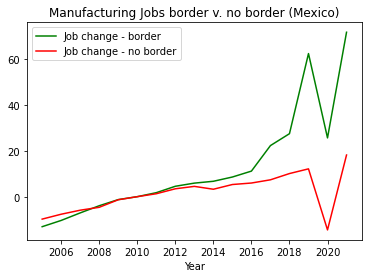

In [12]:
# Create a graphic
df3.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Total Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

In [13]:
# open population data
dfp = pd.read_csv("data/mexico-population-refined.csv")
dfp

,State,2010,2021,Border
0,Total nacional,112336538,126014024,No
1,Aguascalientes,1184996,1425607,No
2,Baja California,3155070,3769020,Yes
3,Baja California Sur,637026,798447,No
4,Campeche,822441,928363,No
5,Coahuila de Zaragoza,2748391,3146771,Yes
6,Colima,650555,731391,No
7,Chiapas,4796580,5543828,No
8,Chihuahua,3406465,3741869,Yes
9,Ciudad de Mexico,8851080,9209944,No


In [14]:
#Population change border and non border
df_population=pd.DataFrame()
df_population["Population 2010"] = dfp.groupby("Border")["2010"].agg("sum")
df_population["Population 2021"] = dfp.groupby("Border")["2021"].agg("sum")
df_population["Population Change"] = df_population["Population 2021"] / df_population["Population 2010"] *100 
df_population


,Population 2010,Population 2021,Population Change
Border,,,
No,204778658,229113371,111.883422
Yes,19894418,22914677,115.181439


In [15]:
list(df3.query("Year == 2021")["Job change - border"])[0]

71.65883827881134

In [25]:
df_change = pd.DataFrame()
df_change["Population"] = df_population["Population Change"]-100
df_change["Jobs"]= [list(df3.query("Year == 2021")["Job change - no border"])[0], list(df3.query("Year == 2021")["Job change - border"])[0]]
df_change

,Population,Jobs
Border,,
No,11.883422,18.153711
Yes,15.181439,71.658838


In [26]:
#Export to CSV
df_change.to_csv("data/mexico-jobs-vs-population.csv", index = False, encoding = "UTF8")

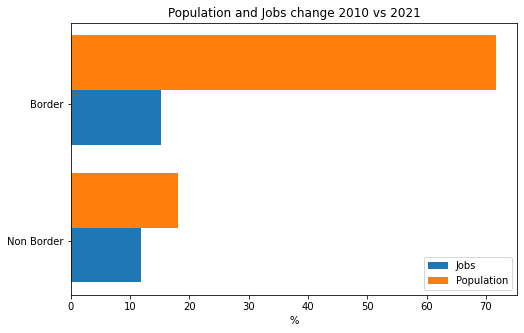

In [27]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = df_change['Population']
serie2 = df_change['Jobs']

# Crear los índices para las barras
ind = np.arange(len(serie1))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, serie1, height=0.4, align='center', label='Jobs')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, serie2, height=0.4, align='edge', label='Population')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Population and Jobs change 2010 vs 2021')
ax.set_yticks(ind)
ax.set_yticklabels(["Non Border", "Border"])

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

In [28]:
df3.query("Year == 2021")["Job change - border"]

16    71.658838
Name: Job change - border, dtype: float64

### Conclusions (2010 v 2021)
The number of total jobs increased in Mexico both on border (71%) and non border states (18%). Before 2016, the pace was similar. 


### Comparison between 2016 and 2021

In [29]:
#Changes since 2016
df31 = df3.query("Year > 2015")
df31

,Year,Job change - border,Job change - no border
11,2016,11.141211,5.947402
12,2017,22.266745,7.349804
13,2018,27.450556,10.074021
14,2019,62.363813,12.123859
15,2020,25.612382,-14.486627
16,2021,71.658838,18.153711


In [30]:
#Calculate percentage changes
df31 ["Year"] = df31["Year"]
df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100 
df31["Job change - no border"] = df31["Job change - no border"] / df31["Job change - no border"].iat[0] * 100 

<ipython-input-30-cadda788d352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31 ["Year"] = df31["Year"]
<ipython-input-30-cadda788d352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100
<ipython-input-30-cadda788d352>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [31]:
df31

,Year,Job change - border,Job change - no border
11,2016,100.000000,100.000000
12,2017,199.859295,123.580076
13,2018,246.387547,169.385231
14,2019,559.757958,203.851329
15,2020,229.888676,-243.579068
16,2021,643.187175,305.237652


<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

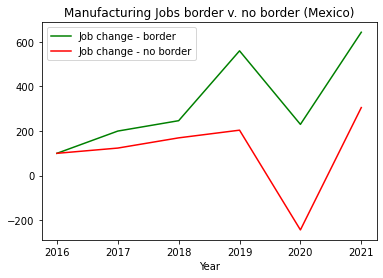

In [32]:
# Create a graphic
df31.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

### Conclusions (2016 v 2021)
The number of total jobs increased in Mexico both on border (54%) and non border states (11%). Before 2016, the pace was similar. 
